## 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import seaborn as sns
import time
from datetime import datetime
import itertools
from itertools import combinations_with_replacement
import os
import ast
from PIL import Image
import gif

In [2]:
from importlib.metadata import version
version('gif')

'3.0.0'

## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Extra Simples

In [3]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

#### Matriz Simples

In [4]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Média

In [5]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.9, 0.9]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.9, 0.9]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.9, 0.9]

matrix_medium = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8])

#### Matriz Complexa

In [6]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

### 1.2. Plota Matrizes

#### Plota Matriz Extra Simples

<Axes: >

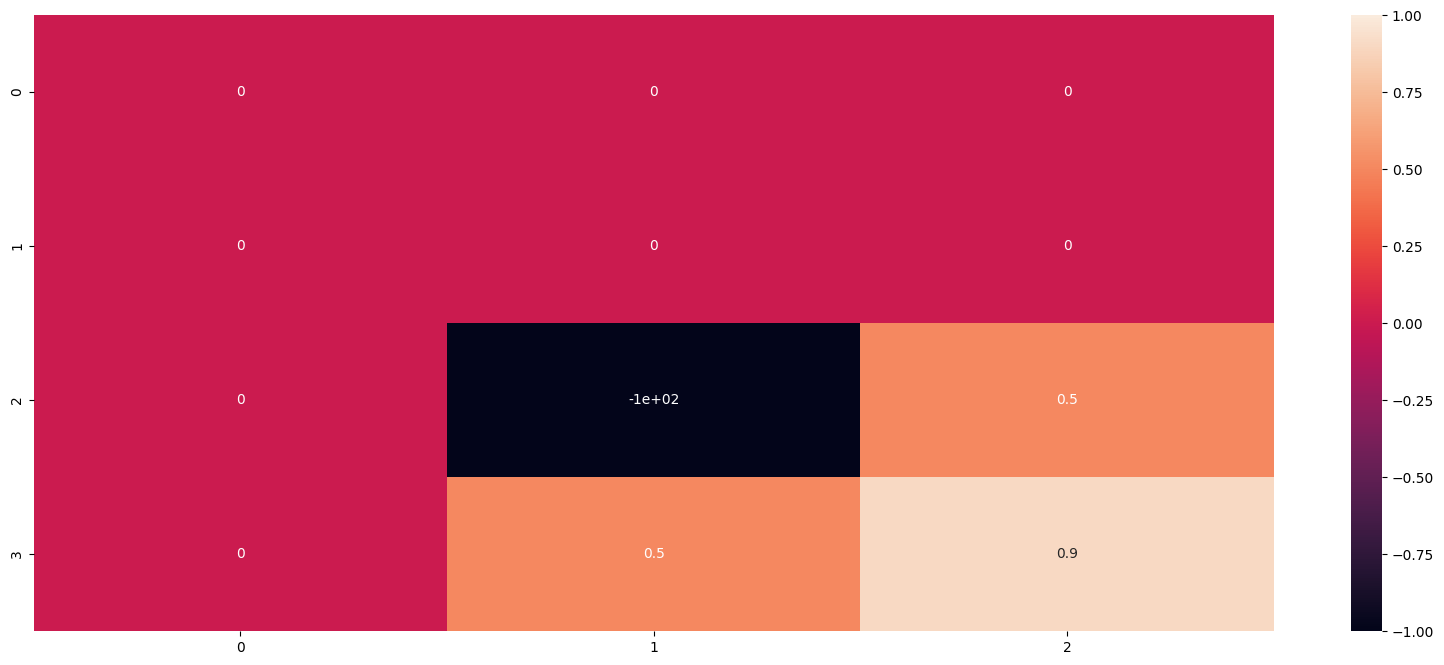

In [7]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

<Axes: >

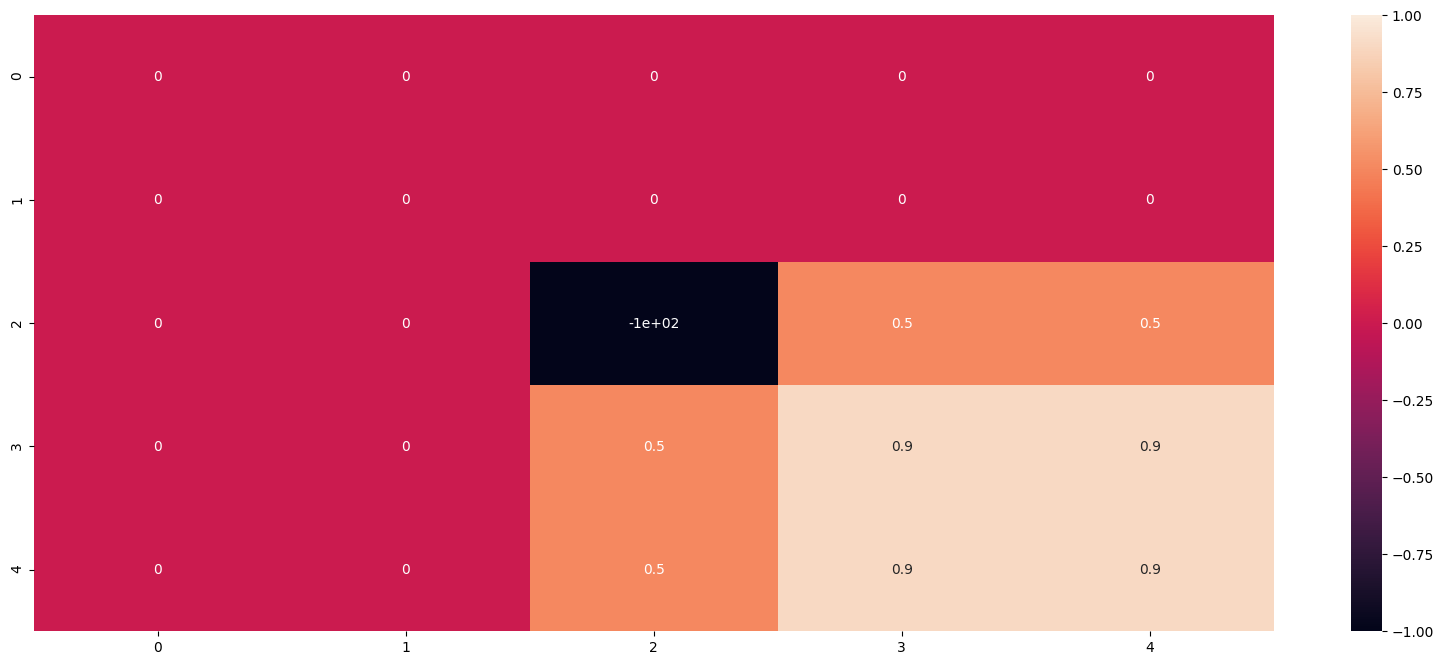

In [8]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Média

<Axes: >

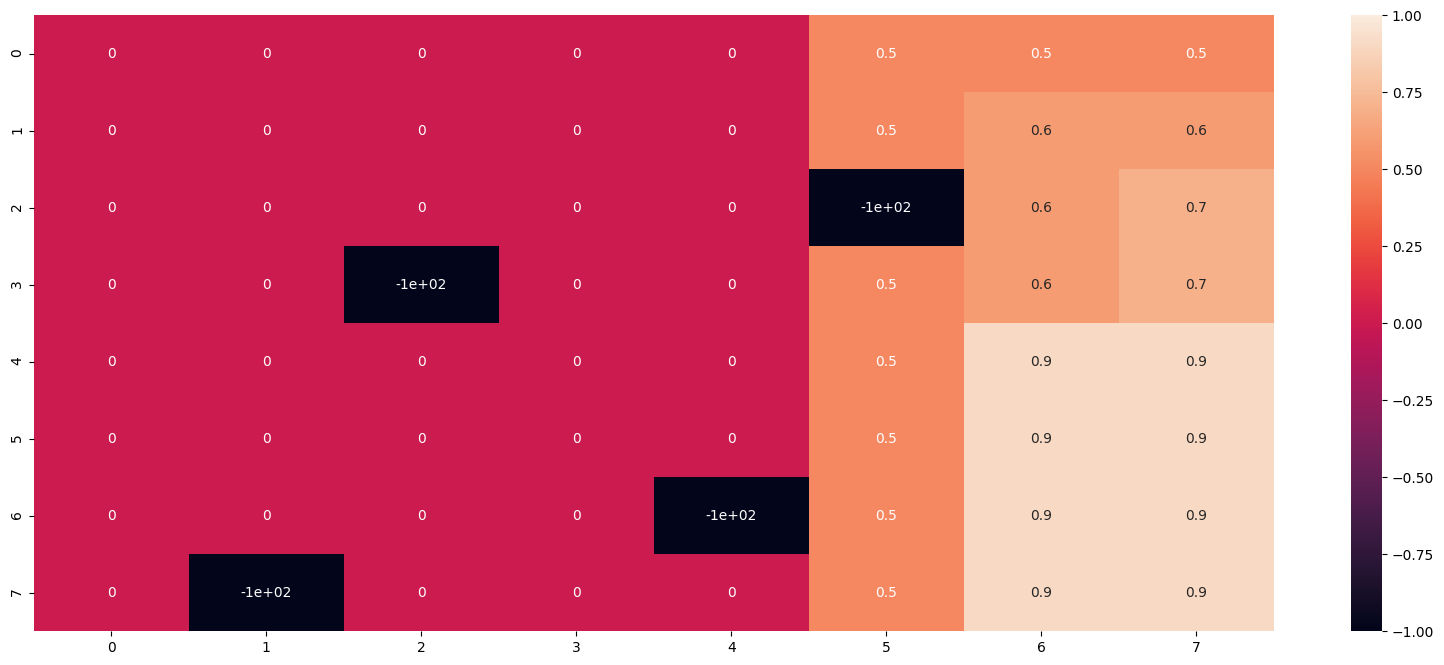

In [9]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_medium, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Complexa

<Axes: >

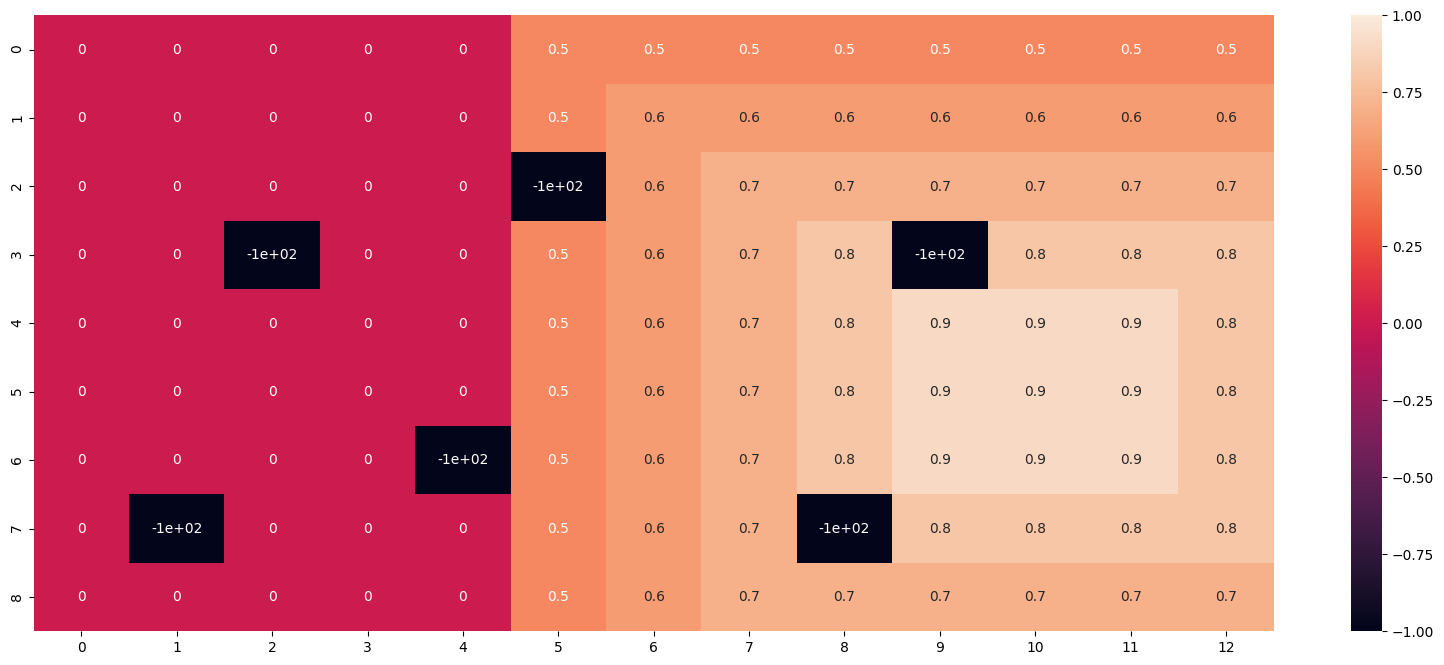

In [10]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

## 2. Importando Arquivos com Resultado

#### 2.1. Extrai informação dos resultados obtidos

In [11]:
# Lê arquivos de resultado de modelos Q Learning
def read_results(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_results = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_results[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='results', index_col=False)
            print('donne with: ', name)

    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_results.keys()]

    return dfs_results

#### 2.2. Extrai informação dos parametros utilizados

In [12]:
# Lê arquivos de parametros de modelos Q Learning
def read_parameters(folder_path):

    # Create an empty dictionary to store the DataFrames
    dfs_parameters = {}

    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".xlsx"):
            # Extract the name of the file without the extension
            name = os.path.splitext(filename)[0]
            # Read the XLSX file into a DataFrame and store it in the dictionary
            dfs_parameters[name] = pd.read_excel(os.path.join(folder_path, filename), sheet_name='parameters', index_col=False)
            print('donne with: ', name)
    # Print the dictionary of DataFrames
    #[print('donne with: ', key) for key in dfs_parameters.keys()]

    return dfs_parameters

### 3. Analisando Resultados

#### 3.1. Cria tabela com melhores e últimos resultados para cada configuração e cada modelo

In [42]:
# Cria dataframe de sumário de resultados obtidos
def create_summary_df(dfs_results, dfs_parameters):
    # Cria listas vazias
    best_results_matrix_simple_filename = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_last_reward = []
    best_results_matrix_simple_max_reward_time = []
    best_results_matrix_simple_last_reward_time = []
    best_results_matrix_simple_max_reward = []
    best_results_matrix_simple_lr = []
    best_results_matrix_simple_gamma = []
    best_results_matrix_simple_d_f = []
    best_results_matrix_simple_exp_rate = []
    best_results_matrix_simple_max_exp_rate = []
    best_results_matrix_simple_min_exp_rate = []
    best_results_matrix_simple_decay_rate = []
    best_results_matrix_simple_rounds = []
    best_results_matrix_simple_max_time_steps = []
    best_results_matrix_simple_last_time_steps = []
    best_results_matrix_simple_steps = []
    best_results_matrix_simple_avg_reward =[]
    best_results_matrix_simple_avg_reward_time = []
    best_results_matrix_simple_avg_time_steps = []
    i=0

    for key in dfs_results.keys():
        
        df_param_temp = dfs_parameters[list(dfs_results.keys())[i]]
        df_results_temp = dfs_results[list(dfs_results.keys())[i]]

        # Apenda Nome do arquivo
        best_results_matrix_simple_filename.append(key)

        # Apenda Melhor resultado de recompensa acumulada
        best_results_matrix_simple_max_reward.append(max(df_results_temp['TOTAL REWARDS']))

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_last_reward.append(df_results_temp['TOTAL REWARDS'].iloc[-1])

        # Apenda Resultado de recompensa acumulada após treinamento
        best_results_matrix_simple_avg_reward.append(np.mean(df_results_temp['TOTAL REWARDS']))

        # Tempo referente ao melhor resultado
        best_results_matrix_simple_max_reward_time.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIME']))

        # Último tempo obtido após treinamento
        best_results_matrix_simple_last_reward_time.append(df_results_temp['TIME'].iloc[-1])

        # Último tempo obtido após treinamento
        best_results_matrix_simple_avg_reward_time.append(np.mean(df_results_temp['TIME']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_max_time_steps.append(min(df_results_temp.loc[df_results_temp['TOTAL REWARDS'] == max(df_results_temp['TOTAL REWARDS'])]['TIMESTEPS']))

        # TIMESTEPS referente ao melhor resultado
        best_results_matrix_simple_avg_time_steps.append(np.mean(df_results_temp['TIMESTEPS']))

        # Último TIMESTEPS obtido após treinamento
        best_results_matrix_simple_last_time_steps.append(df_results_temp['TIMESTEPS'].iloc[-1])

        # Apenda learning rate
        best_results_matrix_simple_lr.append(float(df_param_temp[df_param_temp['parameter name']=='lr']['parameter']))

        # Apenda gamma
        best_results_matrix_simple_gamma.append(float(df_param_temp[df_param_temp['parameter name']=='gamma']['parameter']))

        # Apenda d_f
        best_results_matrix_simple_d_f.append(float(df_param_temp[df_param_temp['parameter name']=='d_f']['parameter']))

        # Apenda exp_rate
        best_results_matrix_simple_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='exp_rate']['parameter']))

        # Apenda max_exp_rate
        best_results_matrix_simple_max_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='max_exp_rate']['parameter']))

        # Apenda min_exp_rate
        best_results_matrix_simple_min_exp_rate.append(float(df_param_temp[df_param_temp['parameter name']=='min_exp_rate']['parameter']))

        # Apenda decay_rate
        best_results_matrix_simple_decay_rate.append(float(df_param_temp[df_param_temp['parameter name']=='decay_rate']['parameter']))

        # Apenda rounds
        best_results_matrix_simple_rounds.append(float(df_param_temp[df_param_temp['parameter name']=='rounds']['parameter']))

        # Apenda steps
        best_results_matrix_simple_steps.append(float(df_param_temp[df_param_temp['parameter name']=='steps']['parameter']))

        i+=1

    # Cria dataframe com principais indicadores e parametros
    df_final_results = pd.DataFrame({'FILE NAME' : best_results_matrix_simple_filename,
                                    'MAX REWARD' : best_results_matrix_simple_max_reward,
                                    'LAST REWARD' : best_results_matrix_simple_last_reward,
                                    'AVG REWARD' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIME' : best_results_matrix_simple_max_reward_time,
                                    'LAST REWARD TIME' : best_results_matrix_simple_last_reward_time,
                                    'AVG REWARD TIME' : best_results_matrix_simple_avg_reward,
                                    'MAX REWARD TIMESTEPS' : best_results_matrix_simple_max_time_steps,
                                    'LAST REWARD TIMESTEPS' : best_results_matrix_simple_last_time_steps,
                                    'AVG REWARD TIMESTEPS' : best_results_matrix_simple_avg_time_steps,
                                    'lr' : best_results_matrix_simple_lr,
                                    'gamma' : best_results_matrix_simple_gamma,
                                    'd_f' : best_results_matrix_simple_d_f,
                                    'exp_rate' : best_results_matrix_simple_exp_rate,
                                    'max_exp_rate' : best_results_matrix_simple_max_exp_rate,
                                    'min_exp_rate' : best_results_matrix_simple_min_exp_rate,
                                    'decay_rate' : best_results_matrix_simple_decay_rate,
                                    'rounds' : best_results_matrix_simple_rounds,
                                    'steps' : best_results_matrix_simple_steps})
    
    return df_final_results


#### 3.2. Funções para filtrar tabelas e plotagem de gráficos

In [14]:
# Filtra dataframe de acordo com a dimensão da matriz estudada
def filter_df(df, matrix_dim):
    df_final_results_filtered = df[df['FILE NAME'].isin(list(filter(lambda k: matrix_dim in k, df['FILE NAME'])))]
    return df_final_results_filtered

In [15]:
# Função que recebe lista com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward)

def plot_episodes(dfs_names_list, variable, dfs_results):
    # Seleciona apenas dfs da lista
    dfs_searched=[]
    for df_names in dfs_names_list:
        dfs_searched.append(dfs_results[df_names])

    # Concatena dfs
    dfs_concat = pd.concat(dfs_searched)

    # Calculate mean of 'x' column for each index
    mean_variable_by_episode = pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index()

    # Estabelece limite inferior e superior
    ci1 = 1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list))

    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))

    fig1 = ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label="Média por Conf")
    fig1 = ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci1), (mean_variable_by_episode[variable]+ci1), color='b', alpha=.1)

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')

    plt.show()

In [16]:
# Função que recebe lista de listas com arquivos a serem plotados, variavel a ser plotada (tempo, steps, total reward). Plota mais de uma curva no mesmo gráfico

def plot_episodes_multi(dfs_names_list_of_lists, variable, dfs_results):

    mean_variable_by_episode_total=[]
    
    # Seleciona apenas dfs da lista
    for dfs_names_list in dfs_names_list_of_lists:
        dfs_searched=[]
        for df_names in dfs_names_list:
            dfs_searched.append(dfs_results[df_names])

        # Concatena dfs
        dfs_concat = pd.concat(dfs_searched).copy()

        # Calculate mean of 'x' column for each index
        mean_variable_by_episode_total.append(pd.DataFrame(dfs_concat.groupby('JOGO')[variable].mean()).reset_index())

    # Estabelece limite inferior e superior
    ci=[]
    i=0
    plots=[]
    
    # Cria gráfico com intervalo de confiança para a média dos mínimos
    fig, ax = plt.subplots(figsize=(12, 6))
    for mean_variable_by_episode in mean_variable_by_episode_total:
        # Cria intervalos de confiança para cada curva
        ci.append(1.96 * mean_variable_by_episode[variable]/np.sqrt(len(dfs_names_list)))

        # Plota curva
        ax.plot(mean_variable_by_episode['JOGO'],mean_variable_by_episode[variable], label=f"Média por Conf {i}")
        ax.fill_between(mean_variable_by_episode['JOGO'], (mean_variable_by_episode[variable]-ci[i]), (mean_variable_by_episode[variable]+ci[i]), color='b', alpha=.1)
        
        i+=1

    ax.legend(loc='upper right')

    plt.title(f'Média {variable} por Episódio')

    plt.ylabel(variable)

    plt.xlabel('Episódio')
    
    plt.show()

In [17]:
dfs_results = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')

donne with:  results_q_learn_dim_4x3_2023-05-31_16-20-18
donne with:  results_q_learn_dim_4x3_2023-05-31_15-37-43
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_dim_4x3_2023-05-31_19-00-44
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-31_16-33-57
donne with:  results_q_learn_dim_4x3_2023-05-31_15-59-24
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-31_16-56-12
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_17-28-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_18-40-18
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_di

In [19]:
vtable = pd.DataFrame(ast.literal_eval(dfs_results['results_q_learn_dim_4x3_2023-05-31_19-07-50']['Vtable'].iloc[-1]))

In [20]:
class Play:
    # Inicializa estado do jogo
    def __init__(self, matrix_game, vtable, d_f, start = (0, 0)):

        # Define fator de perda temporal 
        self.d_f = d_f

        # Rewards (sem fator temporal)
        self.rewards_d_f=[]

        # Rewards (com fator temporal)
        self.rewards=[]

        # Define matriz de função de valor
        self.vtable = vtable

        # Define posição inicial
        self.start = (0, 0)

        # Define vetor de estados percorridos
        self.states = [self.start]

        # Define estado inicial como start
        self.state = start

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

         # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Verifica se jogo terminou
    def isEndFunc(self):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.state not in self.states[:-1]) and (self.ini_reward_matrix[self.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action, state):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (state[0] - 1, state[1])
        elif action == "down":
            nxtState = (state[0] + 1, state[1])
        elif action == "left":
            nxtState = (state[0], state[1] - 1)
        else:
            nxtState = (state[0], state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, retorna 'MOVE NOT ALLOWED'
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                        return nxtState
        return 'MOVE NOT ALLOWED'
    
    # Escolhe quais caminhos legais serão avaliados 
    def legal_paths(self):
        temp_state = self.state
        legal_paths_lst = []
        i=1
        # realiza permutação de ações e avalia cada estado final como valido ou nao valido
        while i>0:
            paths = combinations_with_replacement(['up', 'down', 'left', 'right'], i)
            # Avalia cada caminho
            for path in paths:
                temp_state = self.state
                # Avalia cada movimento dentro de cada caminho e apenda em legal_paths_lst caminhos legais disponíveis
                for move in path:
                    temp_state = self.nxtPosition(move, temp_state)
                    if temp_state != 'MOVE NOT ALLOWED':
                        continue
                    else:
                        break
                # Apenda movimentos legais em lista
                if temp_state != 'MOVE NOT ALLOWED' and (temp_state not in self.states and float(self.vtable.loc[temp_state])!=0):
                    legal_paths_lst.append(path)
            i=i+1
            if len(legal_paths_lst)>0:
                break
        print('legal paths: ', legal_paths_lst)
        return legal_paths_lst
    
    # Escolhe caminho com maior recompensa
    def choose_path(self, legal_paths_lst):
        temp_state = self.state
        reward=0
        for path in legal_paths_lst:
            temp_state = self.state
            for move in path:
                 temp_state = self.nxtPosition(move, temp_state)
            nxt_reward = float(self.vtable.loc[temp_state])
            if temp_state in self.states:
                nxt_reward = 0
            if nxt_reward > reward:
                reward = nxt_reward
                final_path = path
        return final_path
    
    #def save_images(self):
        # Salva imagens
    # Joga de acordo com matriz de fução de valor associada
    def play_game(self):
        # Joga enquando jogo não terminou
        while self.isEnd==False:
            # Escolhe caminho a ser tomado
            final_path = self.choose_path(self.legal_paths())
            print('move taken: ',final_path)

            # Para cada movimento de cada caminho, agente se movimenta e appenda em listas
            for move in final_path:
                # Atualiza estado para proxima posição
                self.state = self.nxtPosition(move, self.state)

                # Apenda estado atual em vetor de estados
                self.states.append(self.state)

                # Apenda recompensa associada ao estado atual
                self.rewards.append(float(self.ini_reward_matrix[self.state]))

                # Apenda recompensa com fator temporal associada ao estado atual
                self.rewards_d_f.append(float(self.ini_reward_matrix[self.state]*(self.d_f**(len(self.states)-1))))

                # Verifica se jogo terminou
                self.isEndFunc()
                
                # Printa listas
                print('estados percorridos: ',self.states)
                print ('recompensas: ', self.rewards)
                print ('recompensas com fator temporal: ', self.rewards_d_f)
                #self.save_images(self.states)
            
        return self.states

# DEBUGAR
if __name__ == "__main__":
    game = Play(matrix_game = matrix_extra_simple,
                vtable = vtable,
                start = (0, 0),
                d_f = 0.95
                )
    game.play_game()

legal paths:  [('down',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1)]
recompensas:  [0.0]
recompensas com fator temporal:  [0.0]
legal paths:  [('down',), ('right',)]
move taken:  ('right',)
estados percorridos:  [(0, 0), (0, 1), (0, 2)]
recompensas:  [0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0]
legal paths:  [('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2)]
recompensas:  [0.0, 0.0, 0.0]
recompensas com fator temporal:  [0.0, 0.0, 0.0]
legal paths:  [('down',), ('left',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994]
legal paths:  [('down',)]
move taken:  ('down',)
estados percorridos:  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2)]
recompensas:  [0.0, 0.0, 0.0, 0.5, 0.9]
recompensas com fator temporal:  [0.0, 0.0, 0.0, 0.40725312499999994, 0.6964028437499998]
l

In [21]:
estados = [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (2, 2)]

In [22]:
def create_gif(matrix, states_lst, duration, title):
    # Set the directory path to your folder of XLSX files
    folder_path = "Resultado_RL_Q_Learning/04_Imagens Temp/"

    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Iterate over each file and delete them
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Ensure it's a file (not a subdirectory)
            os.remove(file_path)

    gif.options.matplotlib["dpi"] = 300
    plt.rcParams["axes.grid"] = False

    i=0
    for estado in states_lst:

        fig, ax = plt.subplots()

        plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)

        plt.text(estado[1], estado[0], 'A', color='black', fontsize=12, ha='center', va='center')
        if i>0:
            j=1
            for j in np.arange(0,i,1):
                plt.text(estados[j][1], estados[j][0], j, color='black', fontsize=12, ha='center', va='center')
        
        # Show the grid lines in grey
        ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
        ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
        ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
        plt.xticks(np.arange(0, matrix.shape[1],1))
        plt.yticks(np.arange(0, matrix.shape[0],1))
        plt.title('title')
        # Salva Figura
        plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i}.png')

        if i==len(estados)-1:
            fig, ax = plt.subplots()
            plt.imshow(matrix, cmap='rocket', interpolation='nearest', vmin=-1, vmax=1)
            j=1
            for j in np.arange(0,i+1,1):
                plt.text(estados[j][1], estados[j][0], j, color='black', fontsize=12, ha='center', va='center')

            # Show the grid lines in grey
            ax.set_xticks(np.arange(-.5, matrix.shape[1], 0.9999), minor=True)
            ax.set_yticks(np.arange(-.5, matrix.shape[0], 0.9999), minor=True)
            ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
            plt.xticks(np.arange(0, matrix.shape[1],1))
            plt.yticks(np.arange(0, matrix.shape[0],1))
            plt.title('title')

            # Salva Figura
            plt.savefig(f'Resultado_RL_Q_Learning/04_Imagens Temp/dataframe_{i+1}.png')
        # Aumenta contador
        i=i+1

    # Create an empty dictionary to store the DataFrames
    image_list =[]

    # Loop through all files in the directory
    for filename in sorted(os.listdir(folder_path)):
        for k in np.arange(0,i+1,1):
            if filename.endswith(f'_{k}.png'):
                # Add images to the list
                image = Image.open(folder_path+filename)
                image_list.append(image)

    date_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    gif.save(image_list, f"Resultado_RL_Q_Learning/05_Gifs Temp/vtable_dim_{matrix.shape[0]}x{matrix.shape[1]}_{date_time}.gif", 
            duration=duration, unit="s", 
            between="startend")

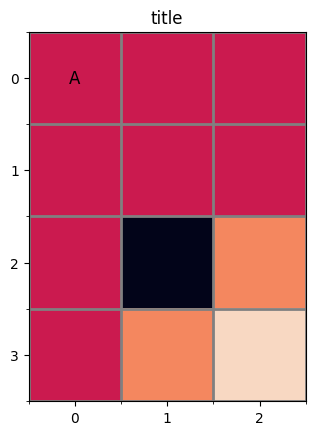

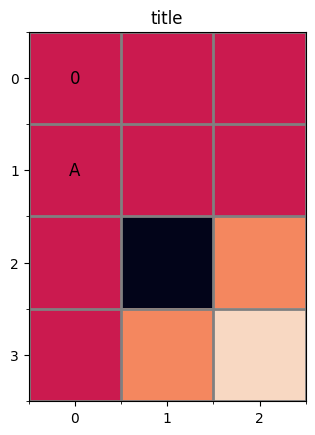

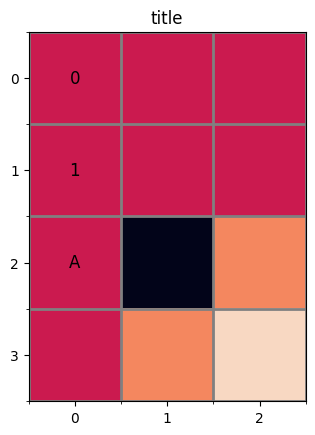

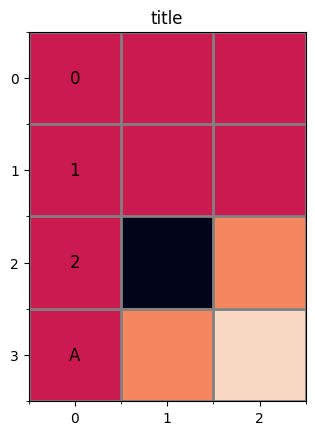

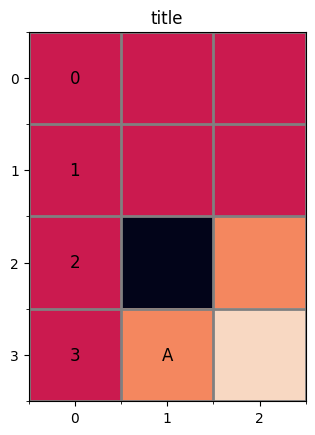

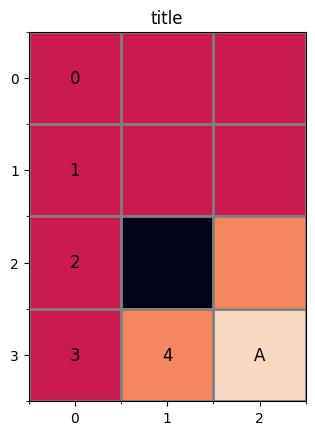

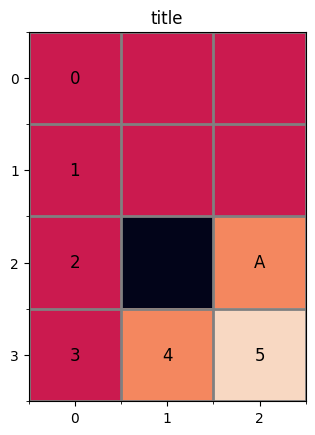

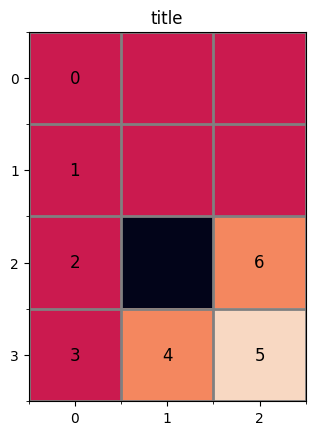

In [23]:
create_gif(matrix_extra_simple, estados, 3, 'title')

#### 3.3. Análise Gráfica do Resultado de Cada Configuração

##### 3.3.1. Resultado matrix_extra_simple (4x3)

In [24]:
dfs_results_4x3 = read_results('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
dfs_param_4x3 = read_parameters('Resultado_RL_Q_Learning/00_Matriz Extra Simple_4x3/00_Analise Best d_f')
df_summary_4x3 = create_summary_df(dfs_results_4x3, dfs_param_4x3).sort_values('d_f')

donne with:  results_q_learn_dim_4x3_2023-05-31_16-20-18
donne with:  results_q_learn_dim_4x3_2023-05-31_15-37-43
donne with:  results_q_learn_dim_4x3_2023-05-31_15-14-37
donne with:  results_q_learn_dim_4x3_2023-05-31_19-00-44
donne with:  results_q_learn_dim_4x3_2023-05-31_00-14-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-47-51
donne with:  results_q_learn_dim_4x3_2023-05-30_21-49-49
donne with:  results_q_learn_dim_4x3_2023-05-30_21-50-32
donne with:  results_q_learn_dim_4x3_2023-05-31_16-33-57
donne with:  results_q_learn_dim_4x3_2023-05-31_15-59-24
donne with:  results_q_learn_dim_4x3_2023-05-30_22-41-23
donne with:  results_q_learn_dim_4x3_2023-05-31_16-56-12
donne with:  results_q_learn_dim_4x3_2023-05-31_14-03-27
donne with:  results_q_learn_dim_4x3_2023-05-31_17-28-25
donne with:  results_q_learn_dim_4x3_2023-05-31_14-22-53
donne with:  results_q_learn_dim_4x3_2023-05-31_18-40-18
donne with:  results_q_learn_dim_4x3_2023-05-31_14-59-22
donne with:  results_q_learn_di

In [25]:
dfs_results_4x3['results_q_learn_dim_4x3_2023-05-31_16-20-18']

,Unnamed: 0,JOGO,TIMESTEPS,TIME,STATES,REWARDS,STATES_REWARDS,TOTAL REWARDS,Vtable,Qtable,exp_rate
0,0,0,126,0.960556,"[(0, 0), (1, 0), (1, 1), (0, 1), (0, 1), (0, 0...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",0.876320,"{0: {0: 1.964393759597111e-08, 1: 1.5953254411...","{'up': {(0, 0): 5.029005971286997e-10, (0, 1):...",1.000000
1,1,1,18,0.117841,"[(0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 2...","[0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0.466032673...","[((0, 0), 0.0), ((0, 0), 0), ((0, 0), 0), ((1,...",1.722232,"{0: {0: 2.7584951409937304e-08, 1: 2.385051415...","{'up': {(0, 0): 6.923465733575267e-10, (0, 1):...",0.999010
2,2,2,78,0.387506,"[(0, 0), (0, 0), (0, 1), (0, 1), (0, 2), (0, 1...","[0.0, 0, 0.0, 0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0...","[((0, 0), 0.0), ((0, 0), 0), ((0, 1), 0.0), ((...",1.037640,"{0: {0: 2.3641884979837954e-07, 1: 1.282860592...","{'up': {(0, 0): 2.3561250092984554e-09, (0, 1)...",0.998022
3,3,3,13,0.095498,"[(0, 0), (0, 0), (0, 1), (0, 2), (1, 2), (0, 2...","[0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0.4707400747005,...","[((0, 0), 0.0), ((0, 0), 0), ((0, 1), 0.0), ((...",1.757268,"{0: {0: 3.753989031396547e-07, 1: 1.2828605924...","{'up': {(0, 0): 4.673110372209428e-09, (0, 1):...",0.997034
4,4,4,32,0.191362,"[(0, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 1...","[0.0, 0.0, 0, 0.0, 0, 0, 0, 0.0, 0, 0.0, 0, 0,...","[((0, 0), 0.0), ((1, 0), 0.0), ((0, 0), 0), ((...",1.419665,"{0: {0: 1.1172146594279636e-06, 1: 1.282860592...","{'up': {(0, 0): 1.2997348616803311e-08, (0, 1)...",0.996048
...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,7995,7,0.089095,"[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2...","[0.0, 0.0, 0.0, 0.0, 0.4851495, 0.864536409, 0...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",1.825181,"{0: {0: 6.397831838501192, 1: 6.48427794103584...","{'up': {(0, 0): 3.1492262217424516, (0, 1): 0....",0.010334
7996,7996,7996,7,0.109381,"[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2...","[0.0, 0.0, 0.0, 0.0, 0.4851495, 0.864536409, 0...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",1.825181,"{0: {0: 6.398047871732435, 1: 6.48455489348790...","{'up': {(0, 0): 3.1492262217424516, (0, 1): 0....",0.010333
7997,7997,7997,7,0.100172,"[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2...","[0.0, 0.0, 0.0, 0.0, 0.4851495, 0.864536409, 0...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",1.825181,"{0: {0: 6.398264486460641, 1: 6.48483148867453...","{'up': {(0, 0): 3.1492262217424516, (0, 1): 0....",0.010333
7998,7998,7998,7,0.100662,"[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2...","[0.0, 0.0, 0.0, 0.0, 0.4851495, 0.864536409, 0...","[((0, 0), 0.0), ((1, 0), 0.0), ((1, 1), 0.0), ...",1.825181,"{0: {0: 6.3984816733339125, 1: 6.4851076967934...","{'up': {(0, 0): 3.1492262217424516, (0, 1): 0....",0.010333


In [44]:
df_summary_4x3

,FILE NAME,MAX REWARD,LAST REWARD,AVG REWARD,MAX REWARD TIME,LAST REWARD TIME,AVG REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,AVG REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
54,results_q_learn_dim_4x3_2023-05-30_21-04-18,0.788480,0.788480,0.686435,0.117139,0.229786,0.686435,7,7,11.063375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
50,results_q_learn_dim_4x3_2023-05-30_21-04-41,0.788480,0.788480,0.687998,0.122864,0.213250,0.687998,7,7,11.061250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
36,results_q_learn_dim_4x3_2023-05-30_21-47-57,0.788480,0.788480,0.661088,0.114759,0.230852,0.661088,7,7,22.370125,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
4,results_q_learn_dim_4x3_2023-05-31_00-14-25,0.788480,0.788480,0.590514,0.148311,0.264013,0.590514,7,7,55.150250,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
6,results_q_learn_dim_4x3_2023-05-30_21-49-49,0.788480,0.788480,0.660663,0.074477,0.296738,0.660663,7,7,23.013875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
7,results_q_learn_dim_4x3_2023-05-30_21-50-32,0.788480,0.788480,0.657450,0.093618,0.285561,0.657450,7,7,23.030875,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
51,results_q_learn_dim_4x3_2023-05-30_23-53-31,0.788480,0.788480,0.601835,0.131399,0.254145,0.601835,7,7,51.375375,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
25,results_q_learn_dim_4x3_2023-05-30_23-53-14,0.788480,0.788480,0.601240,0.087934,0.177671,0.601240,7,7,50.549500,0.01,0.99,0.8000,0.010332,1.0,0.01,0.001,8000.0,7.0
19,results_q_learn_dim_4x3_2023-05-31_14-20-49,1.250235,1.250235,1.102893,0.050521,0.081961,1.102893,7,7,19.612375,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0
34,results_q_learn_dim_4x3_2023-05-31_15-15-13,1.250235,1.250235,1.020999,0.051804,0.112038,1.020999,7,7,46.150750,0.01,0.99,0.9000,0.010332,1.0,0.01,0.001,8000.0,7.0


In [34]:
len(df_summary_4x3[df_summary_4x3['d_f']==0.8])

8

In [35]:
# d_f = 0.8
df_summary_4x3['FILE NAME'][:8]

54    results_q_learn_dim_4x3_2023-05-30_21-04-18
50    results_q_learn_dim_4x3_2023-05-30_21-04-41
36    results_q_learn_dim_4x3_2023-05-30_21-47-57
4     results_q_learn_dim_4x3_2023-05-31_00-14-25
6     results_q_learn_dim_4x3_2023-05-30_21-49-49
7     results_q_learn_dim_4x3_2023-05-30_21-50-32
51    results_q_learn_dim_4x3_2023-05-30_23-53-31
25    results_q_learn_dim_4x3_2023-05-30_23-53-14
Name: FILE NAME, dtype: object

In [36]:
# d_f = 0.9
df_summary_4x3['FILE NAME'][8:20]

19    results_q_learn_dim_4x3_2023-05-31_14-20-49
34    results_q_learn_dim_4x3_2023-05-31_15-15-13
16    results_q_learn_dim_4x3_2023-05-31_14-59-22
14    results_q_learn_dim_4x3_2023-05-31_14-22-53
56    results_q_learn_dim_4x3_2023-05-31_14-07-52
10    results_q_learn_dim_4x3_2023-05-30_22-41-23
26    results_q_learn_dim_4x3_2023-05-31_15-30-47
48    results_q_learn_dim_4x3_2023-05-30_23-00-08
2     results_q_learn_dim_4x3_2023-05-31_15-14-37
1     results_q_learn_dim_4x3_2023-05-31_15-37-43
12    results_q_learn_dim_4x3_2023-05-31_14-03-27
21    results_q_learn_dim_4x3_2023-05-31_15-21-26
Name: FILE NAME, dtype: object

In [37]:
# d_f = 0.95
df_summary_4x3['FILE NAME'][20:30]

24    results_q_learn_dim_4x3_2023-05-31_15-33-47
46    results_q_learn_dim_4x3_2023-05-31_15-48-35
35    results_q_learn_dim_4x3_2023-05-31_16-31-04
18    results_q_learn_dim_4x3_2023-05-31_15-51-17
11    results_q_learn_dim_4x3_2023-05-31_16-56-12
9     results_q_learn_dim_4x3_2023-05-31_15-59-24
8     results_q_learn_dim_4x3_2023-05-31_16-33-57
5     results_q_learn_dim_4x3_2023-05-31_14-47-51
22    results_q_learn_dim_4x3_2023-05-31_15-54-56
39    results_q_learn_dim_4x3_2023-05-31_17-05-42
Name: FILE NAME, dtype: object

In [38]:
# d_f = 0.99
df_summary_4x3['FILE NAME'][30:40]

37    results_q_learn_dim_4x3_2023-05-31_17-06-59
0     results_q_learn_dim_4x3_2023-05-31_16-20-18
43    results_q_learn_dim_4x3_2023-05-31_16-29-06
57    results_q_learn_dim_4x3_2023-05-31_17-19-37
41    results_q_learn_dim_4x3_2023-05-31_15-22-38
52    results_q_learn_dim_4x3_2023-05-31_16-41-01
59    results_q_learn_dim_4x3_2023-05-31_17-54-13
31    results_q_learn_dim_4x3_2023-05-31_17-10-51
58    results_q_learn_dim_4x3_2023-05-31_16-34-35
17    results_q_learn_dim_4x3_2023-05-31_16-41-54
Name: FILE NAME, dtype: object

In [39]:
# d_f = 0.999
df_summary_4x3['FILE NAME'][40:50]

32    results_q_learn_dim_4x3_2023-05-31_18-18-09
38    results_q_learn_dim_4x3_2023-05-31_17-39-45
40    results_q_learn_dim_4x3_2023-05-31_18-05-29
13    results_q_learn_dim_4x3_2023-05-31_17-28-25
44    results_q_learn_dim_4x3_2023-05-31_15-57-29
28    results_q_learn_dim_4x3_2023-05-31_17-20-09
47    results_q_learn_dim_4x3_2023-05-31_17-25-29
49    results_q_learn_dim_4x3_2023-05-31_18-12-37
23    results_q_learn_dim_4x3_2023-05-31_17-32-20
20    results_q_learn_dim_4x3_2023-05-31_17-57-07
Name: FILE NAME, dtype: object

In [40]:
# d_f = 0.9999
df_summary_4x3['FILE NAME'][50:60]

3     results_q_learn_dim_4x3_2023-05-31_19-00-44
55    results_q_learn_dim_4x3_2023-05-31_18-07-59
15    results_q_learn_dim_4x3_2023-05-31_18-40-18
27    results_q_learn_dim_4x3_2023-05-31_17-44-37
33    results_q_learn_dim_4x3_2023-05-31_18-13-49
45    results_q_learn_dim_4x3_2023-05-31_19-07-50
42    results_q_learn_dim_4x3_2023-05-31_17-52-18
30    results_q_learn_dim_4x3_2023-05-31_18-57-39
53    results_q_learn_dim_4x3_2023-05-31_17-13-36
29    results_q_learn_dim_4x3_2023-05-31_18-15-09
Name: FILE NAME, dtype: object

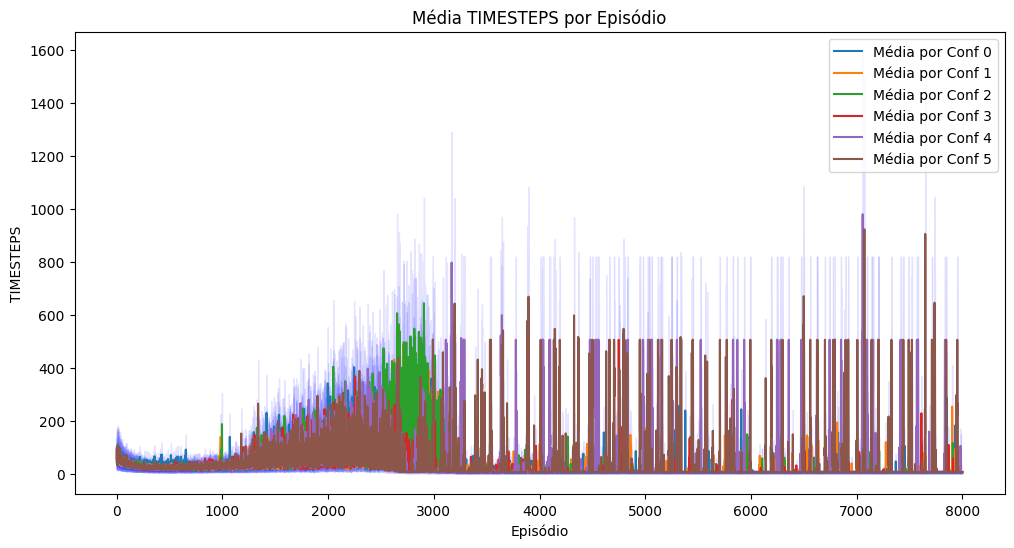

In [41]:
plot_episodes_multi([df_summary_4x3['FILE NAME'][:8], # d_f = 0.8 Conf 0
                     df_summary_4x3['FILE NAME'][8:20], # d_f = 0.90 Conf 1
                     df_summary_4x3['FILE NAME'][20:30], # d_f = 0.95 Conf 2
                     df_summary_4x3['FILE NAME'][30:40], # d_f = 0.99 Conf 3
                     df_summary_4x3['FILE NAME'][40:50], # d_f = 0.999 Conf 4
                     df_summary_4x3['FILE NAME'][50:60]] # d_f = 0.9999 Conf 5
                     ,
                     variable='TIMESTEPS',
                     dfs_results=dfs_results_4x3)

##### 3.3.2. Resultado matrix_simple (5x5)

In [ ]:
df_final_results_5x5 = filter_df(df_final_results, '5x5')

In [ ]:
df_final_results_5x5.sort_values(by='LAST REWARD', ascending = False)

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
0,results_q_learn_dim_5x5_2023-04-27_08-40-31,2.571175,2.571175,0.166394,0.233813,13,13,0.7,0.95,0.9,0.013471,0.5,0.01,0.05,100.0,13.0
4,results_q_learn_dim_5x5_2023-04-28_07-43-38,2.571175,2.571175,0.209005,0.480001,13,13,0.8,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,13.0
3,results_q_learn_dim_5x5_2023-04-27_18-42-06,2.617694,2.383123,0.258999,0.265000,15,14,0.7,0.95,0.9,0.010000,1.0,0.01,0.05,10000.0,14.0
6,results_q_learn_dim_5x5_2023-04-28_08-00-35,2.383123,2.383123,0.194000,0.231997,14,14,0.8,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,14.0
1,results_q_learn_dim_5x5_2023-04-27_09-05-49,1.701196,0.614132,0.764841,5.477783,70,277,0.7,0.95,0.9,0.013471,0.5,0.01,0.05,100.0,277.0
2,results_q_learn_dim_5x5_2023-04-27_10-12-21,2.569959,0.586465,0.135031,4.056053,13,301,0.7,0.95,0.9,0.010000,0.7,0.01,0.05,1000.0,301.0
5,results_q_learn_dim_5x5_2023-04-28_07-56-43,2.116934,0.215234,11.137983,4.868670,500,209,0.9,0.95,0.9,0.010047,1.0,0.01,0.05,200.0,209.0


In [ ]:
df_final_results_5x5_rounds_200 = df_final_results_5x5[df_final_results_5x5['rounds']==200].sort_values(by='LAST REWARD', ascending = False)

In [ ]:
df_final_results_5x5_rounds_200_lr_08 = df_final_results_5x5_rounds_200[df_final_results_5x5_rounds_200['lr']==0.8]
df_final_results_5x5_rounds_200_lr_09 = df_final_results_5x5_rounds_200[df_final_results_5x5_rounds_200['lr']==0.9]

In [ ]:
df_final_results_5x5_rounds_100 = df_final_results_5x5[df_final_results_5x5['rounds']==100].sort_values(by='LAST REWARD', ascending = False)

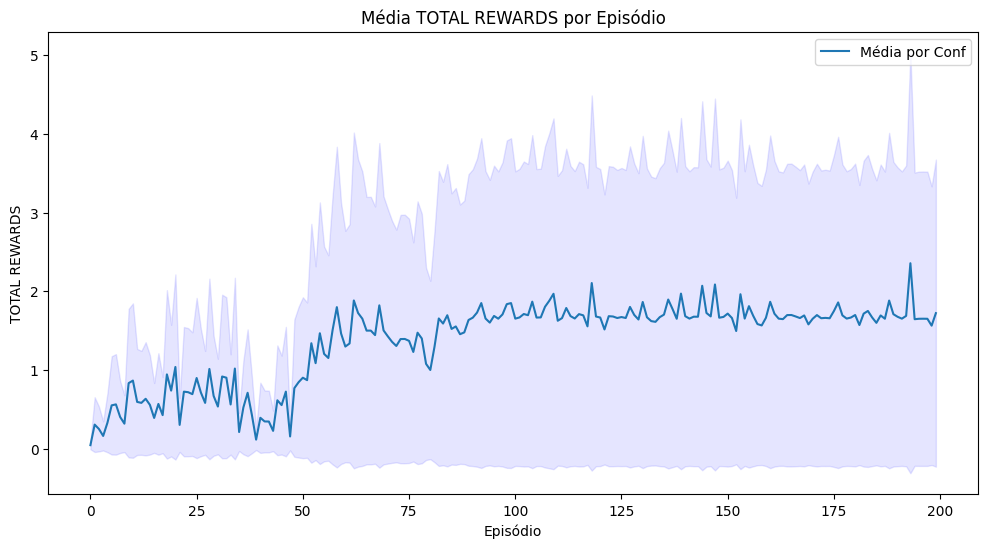

In [ ]:
plot_episodes(df_final_results_5x5_rounds_200['FILE NAME'], variable='TOTAL REWARDS')

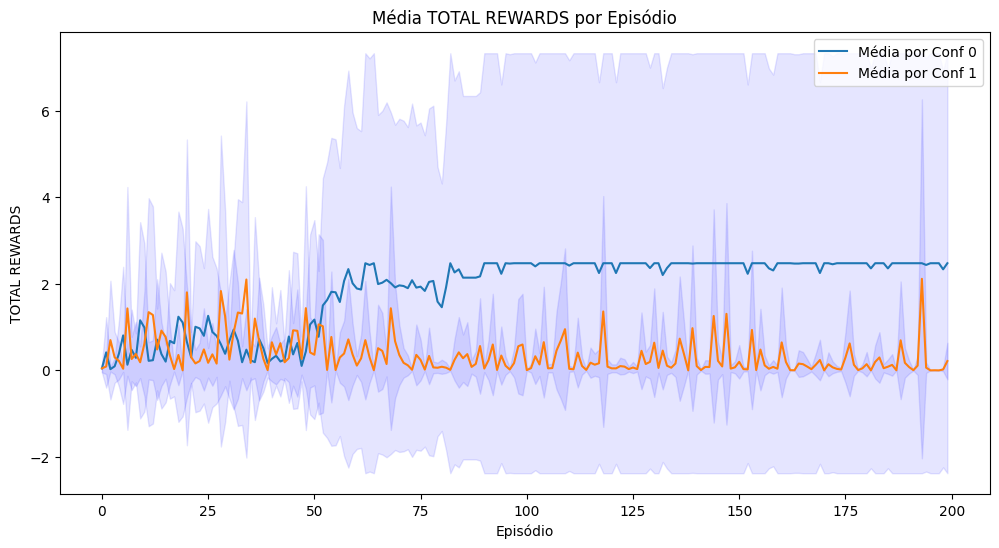

In [ ]:
plot_episodes_multi([df_final_results_5x5_rounds_200_lr_08['FILE NAME'],
                     df_final_results_5x5_rounds_200_lr_09['FILE NAME']],
                     variable='TOTAL REWARDS')

In [ ]:
# Iterando por combinações dos parâmetros 20x

matrix_list = [matrix_extra_simple, matrix_simple, matrix_medium] # Ambiente(Matriz) a ser percorrida
lr_list = [0.6, 0.7, 0.8, 0.9] # Learning Rate: Grau de atualização de peso para estado/ação atual
gamma_list = [0.7, 0.8, 0.9, 0.95] # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
d_f_list = [0.8, 0.9, 0.95, 0.99] # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos
exp_rate_list = [0.3, 0.5, 0.7, 1] # Exploration rate
min_exp_rate_list = [0.01, 0.2] # Minimum exploration probability 
decay_rate_list = [0.005, 0.01, 0.05, 0.1] # Exponential decay rate for exploration prob
max_steps_list = [200] # Qtd de passos até jogo ser finalizado
rounds_list = [100, 200, 1000, 5000, 10000] # Qtd de jogos

for matrix in matrix_list:
    for lr in lr_list:
        for gamma in gamma_list:
            for d_f in d_f_list:
                for exp_rate in exp_rate_list:
                    for min_exp_rate in min_exp_rate_list:
                        for decay_rate in decay_rate_list:
                            for max_steps in max_steps_list:
                                for rounds in rounds_list:
                                    # PLOTAR GRAFICO REFERENTE A CADA CONFIGURAÇÃO

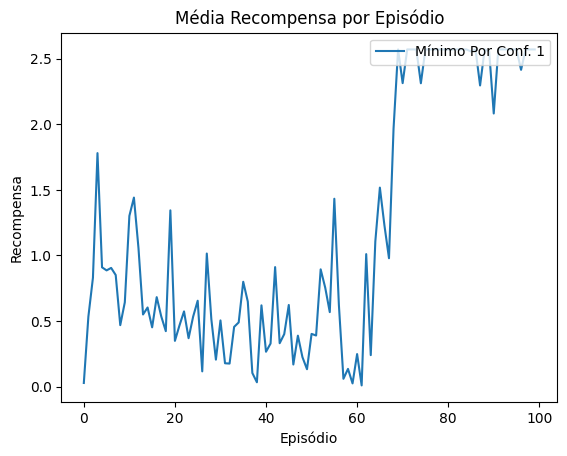

In [ ]:
# Cria gráfico com intervalo de confiança para a média dos mínimos
df = dfs_results['results_q_learn_dim_5x5_2023-04-27_08-40-31']
# Estabelece limite inferior e superior
#ci1 = 1.96 * df['TOTAL REWARDS']/np.sqrt(20)

fig, ax = plt.subplots()

fig1 = ax.plot(df['JOGO'],df['TOTAL REWARDS'], label="Mínimo Por Conf. 1")
# fig1 = ax.fill_between(df['JOGO'], (df['TOTAL REWARDS']-ci1), (df['TOTAL REWARDS']+ci1), color='b', alpha=.1)

ax.legend(loc='upper right')

plt.title('Média Recompensa por Episódio')

plt.ylabel('Recompensa')

plt.xlabel('Episódio')

plt.show()

#### 3.3.3. Resultado matrix_medium (8x8)

In [ ]:
df_final_results_8x8 = filter_df(df_final_results, '8x8')

In [ ]:
df_final_results_8x8

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps


#### 3.3.4. Resultado matrix_complex (13x9)

In [ ]:
df_final_results_9x13 = filter_df(df_final_results, '9x13')

In [ ]:
df_final_results_9x13

,FILE NAME,MAX REWARD,LAST REWARD,MAX REWARD TIME,LAST REWARD TIME,MAX REWARD TIMESTEPS,LAST REWARD TIMESTEPS,lr,gamma,d_f,exp_rate,max_exp_rate,min_exp_rate,decay_rate,rounds,steps
7,results_q_learn_dim_9x13_2023-04-28_08-05-11,0.009597,1.024588e-03,4.089003,3.632998,500,500,0.8,0.95,0.900,0.951717,1.0,0.01,0.05,2.0,500.0
8,results_q_learn_dim_9x13_2023-04-28_08-18-28,0.620079,1.457472e-04,7.718930,12.558116,500,500,0.8,0.95,0.900,0.017013,1.0,0.01,0.05,100.0,500.0
9,results_q_learn_dim_9x13_2023-04-28_08-20-45,0.993431,1.039493e-01,8.684000,9.582583,1000,1000,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,1000.0
10,results_q_learn_dim_9x13_2023-04-28_08-22-26,0.173343,2.142226e-02,13.841992,15.352000,2000,1907,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,1907.0
11,results_q_learn_dim_9x13_2023-04-28_08-27-17,0.035836,3.583621e-02,50.046057,50.046057,6642,6642,0.8,0.95,0.900,0.820543,1.0,0.01,0.05,5.0,6642.0
12,results_q_learn_dim_9x13_2023-04-28_11-23-04,0.782785,2.800295e-09,62.531928,21.802055,4319,1215,0.8,0.95,0.900,0.010047,1.0,0.01,0.05,200.0,1215.0
13,results_q_learn_dim_9x13_2023-04-28_13-31-51,40.351296,1.299078e+01,16.453002,105.683236,1386,4830,0.8,0.95,0.999,0.017013,1.0,0.01,0.05,100.0,4830.0
14,results_q_learn_dim_9x13_2023-04-29_23-39-21,40.084578,8.183103e+00,8.585000,96.108914,760,5000,0.8,0.95,0.999,0.010000,1.0,0.01,0.05,500.0,5000.0
15,results_q_learn_dim_9x13_2023-05-02_20-09-28,47.100000,3.310000e+01,7.407532,88.053348,901,5000,0.8,0.95,1.000,0.010000,1.0,0.01,0.05,500.0,5000.0
16,results_q_learn_dim_9x13_2023-05-03_08-30-02,4.042473,9.431993e-01,105.109862,103.649143,5000,5000,0.9,0.95,0.950,0.010000,1.0,0.01,0.05,500.0,5000.0
